In [1]:
import h5py
import glob

path = "/Volumes/simulations/BBH001/output-????/BBH001/"
fn = glob.glob(path+"mp_[Pp]si4.h5")
fn

['/Volumes/simulations/BBH001/output-0000/BBH001/mp_psi4.h5',
 '/Volumes/simulations/BBH001/output-0001/BBH001/mp_psi4.h5',
 '/Volumes/simulations/BBH001/output-0002/BBH001/mp_psi4.h5',
 '/Volumes/simulations/BBH001/output-0003/BBH001/mp_psi4.h5',
 '/Volumes/simulations/BBH001/output-0004/BBH001/mp_psi4.h5']

In [2]:
import math
def joinDsets(dsets):
        """joints multiple datasets which each have a
        time like first column, eg iteration number of
        time. Removes overlapping segments, keeping the
        last segment.

        dsets = iterable of 2d array like objects with data"""
        # joins multiple datasets of which the first column is assumed to be "time"
        if(not dsets):
                return None
        length = 0
        for d in dsets:
                length += len(d)
        newshape = list(dsets[0].shape)
        newshape[0] = length
        dset = np.empty(shape=newshape, dtype=dsets[0].dtype)
        usedlength = 0
        for d in dsets:
                insertpointidx = np.where(dset[0:usedlength,0] >= d[0,0])
                if(insertpointidx[0].size):
                        insertpoint = insertpointidx[0][0]
                else:
                        insertpoint = usedlength
                newlength = insertpoint+len(d)
                dset[insertpoint:newlength] = d
                usedlength = newlength
        return dset[0:usedlength]

def loadHDF5Series(nameglob, series):
        """load HDF5 timeseries data and concatenate the content of multiple files

        nameglob = a shell glob that matches all files to be loaded,
        files are sorted alphabetically
        series = HDF5 dataset name of dataset to load from files"""
        dsets = list()
        for fn in sorted(glob.glob(nameglob)):
                fh = h5py.File(fn, "r")
                dsets.append(fh[series])
        return joinDsets(dsets)
    
def RadialToTortoise(r, M):
        """
        Convert the radial coordinate to the tortoise coordinate

        r = radial coordinate
        M = ADMMass used to convert coordinate
        return = tortoise coordinate value
        """
        return r + 2. * M * math.log( r / (2. * M) - 1.)

In [3]:
import re
import numpy as np

radii = set()
modes = set()
dsets = dict()

with h5py.File(fn[0], "r") as fh:
    for dset in fh:
        m = re.match(r'l(\d*)_m(-?\d*)_r(\d*\.\d)', dset)
        if m:
            radius = float(m.group(3))
            mode = (int(m.group(1)), int(m.group(2)))
            modes.add(mode)
            radii.add(radius)
            dsets[(radius, mode)] = dset


mp_psi4_vars_500 = []
psi4dsetname_500 = dsets[(500, (2,2))]
mp_psi4_500 = loadHDF5Series("/Volumes/simulations/BBH001/output-0000/BBH001/mp_[Pp]si4.h5", psi4dsetname_500)
mp_psi4_vars_500.append(mp_psi4_500)

mp_psi4_vars_100 = []
psi4dsetname_100 = dsets[(100, (2,2))]
mp_psi4_100 = loadHDF5Series("/Volumes/simulations/BBH001/output-0000/BBH001/mp_[Pp]si4.h5", psi4dsetname_100)
mp_psi4_vars_100.append(mp_psi4_100)

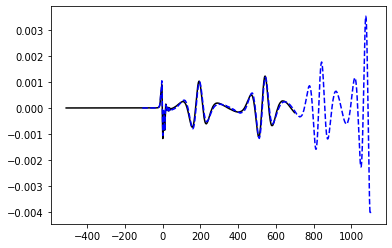

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mp_psi4_500[:,0]-RadialToTortoise(500, 1),mp_psi4_500[:,1]*500,'k',label='Recent Run')
ax.plot(mp_psi4_100[:,0]-RadialToTortoise(100, 1),mp_psi4_100[:,1]*100,'b--',label='Recent Run')
# ax.set_xlim(1500,2000) 

In [5]:
radii = set()
modes = set()
dsets = dict()

with h5py.File(fn[2], "r") as fh:
    for dset in fh:
        m = re.match(r'l(\d*)_m(-?\d*)_r(\d*\.\d)', dset)
        if m:
            radius = float(m.group(3))
            mode = (int(m.group(1)), int(m.group(2)))
            modes.add(mode)
            radii.add(radius)
            dsets[(radius, mode)] = dset


mp_psi4_vars_500_a = []
psi4dsetname_500_a = dsets[(500, (2,2))]
mp_psi4_500_a = loadHDF5Series("/Volumes/simulations/BBH001/output-0003/BBH001/mp_[Pp]si4.h5", psi4dsetname_500_a)
mp_psi4_vars_500_a.append(mp_psi4_500_a)

mp_psi4_vars_100_a = []
psi4dsetname_100_a = dsets[(100, (2,2))]
mp_psi4_100_a = loadHDF5Series("/Volumes/simulations/BBH001/output-0003/BBH001/mp_[Pp]si4.h5", psi4dsetname_100_a)
mp_psi4_vars_100_a.append(mp_psi4_100_a)

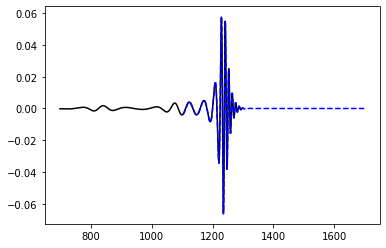

In [6]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mp_psi4_500_a[:,0]-RadialToTortoise(500, 1),mp_psi4_500_a[:,1]*500,'k',label='Recent Run')
ax.plot(mp_psi4_100_a[:,0]-RadialToTortoise(100, 1),mp_psi4_100_a[:,1]*100,'b--',label='Recent Run')
# ax.set_xlim(1000,1350)

In [7]:
radii = set()
modes = set()
dsets = dict()

with h5py.File(fn[3], "r") as fh:
    for dset in fh:
        m = re.match(r'l(\d*)_m(-?\d*)_r(\d*\.\d)', dset)
        if m:
            radius = float(m.group(3))
            mode = (int(m.group(1)), int(m.group(2)))
            modes.add(mode)
            radii.add(radius)
            dsets[(radius, mode)] = dset


mp_psi4_vars_500_a = []
psi4dsetname_500_a = dsets[(500, (2,2))]
mp_psi4_500_a = loadHDF5Series("/Volumes/simulations/BBH001/output-0004/BBH001/mp_[Pp]si4.h5", psi4dsetname_500_a)
mp_psi4_vars_500_a.append(mp_psi4_500_a)

mp_psi4_vars_100_a = []
psi4dsetname_100_a = dsets[(100, (2,2))]
mp_psi4_100_a = loadHDF5Series("/Volumes/simulations/BBH001/output-0004/BBH001/mp_[Pp]si4.h5", psi4dsetname_100_a)
mp_psi4_vars_100_a.append(mp_psi4_100_a)

(-0.0001, 0.0001)

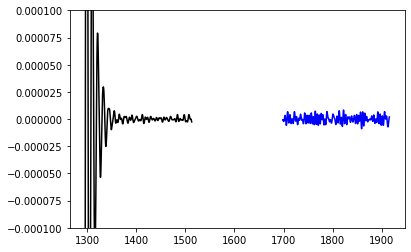

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)

ax.plot(mp_psi4_500_a[:,0]-RadialToTortoise(500, 1),mp_psi4_500_a[:,1]*500,'k',label='Recent Run')
ax.plot(mp_psi4_100_a[:,0]-RadialToTortoise(100, 1),mp_psi4_100_a[:,1]*100,'b',label='Recent Run')
ax.set_ylim(-0.0001,0.0001)